## Bearish Keywords

In [142]:
import pandas as pd
import os
group = "bearish"
path_cwd = os.getcwd()
path_full = os.path.join(path_cwd, group)



In [143]:
folder_path = []
subreddits = []
for folder in os.listdir(path_full):
    subreddits.append(folder)
    p = os.path.join(path_full, folder)
    folder_path.append(p)
    print(p)

c:\Share\CODE\POC\poc_pytorch\bearish\investing
c:\Share\CODE\POC\poc_pytorch\bearish\personalfinance
c:\Share\CODE\POC\poc_pytorch\bearish\StockMarket
c:\Share\CODE\POC\poc_pytorch\bearish\stocks
c:\Share\CODE\POC\poc_pytorch\bearish\ValueInvesting
c:\Share\CODE\POC\poc_pytorch\bearish\wallstreetbets


In [144]:
def extract_keywords(text):
    ls_text = text.split("_")
    r = ls_text[-1]
    return r

print(extract_keywords("reddit_ValueInvesting_posts_bubble"))

bubble


In [145]:
paths_json = []
for folder in folder_path:
    for file in os.listdir(folder):
        if file.endswith(".json"):
            full_path = os.path.join(folder, file)
            paths_json.append(full_path)
            print(full_path)

c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_bear.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_breakdown.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_bubble.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_burst.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_collapse.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_correction.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_crash.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_crisis.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_dead.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_decline.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_deficit.json
c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_deflation.j

In [146]:
all_dfs = []
for path in paths_json:
    df = pd.read_json(path)
    keyword = os.path.splitext(extract_keywords(os.path.basename(path)))[0]
    df['keyword'] = keyword
    df['subreddit'] = os.path.basename(os.path.dirname(path))
    all_dfs.append(df)
    print(f"Path: {path} | Shape: {df.shape}")

Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_bear.json | Shape: (221, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_breakdown.json | Shape: (228, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_bubble.json | Shape: (225, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_burst.json | Shape: (226, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_collapse.json | Shape: (230, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_correction.json | Shape: (232, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_crash.json | Shape: (215, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_crisis.json | Shape: (226, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bearish\investing\reddit_investing_posts_dead.json | Shape: (225, 9)
Path: c:\Share\CODE\POC\poc_pytorc

In [147]:
final_df = pd.concat(all_dfs, ignore_index=True)
print(f"Final DataFrame Shape: {final_df.shape}")
final_df.head()

Final DataFrame Shape: (60569, 9)


,title,score,id,url,comms_num,created,body,keyword,subreddit
0,"For people asking if we are near the bottom, s...",3697,fm6vsz,https://www.reddit.com/r/investing/comments/fm...,1211,2020-03-21T01:25:14Z,You people sound ridiculous. We've had a bull ...,bear,investing
1,The Fed really is fighting inflation – so don’...,1690,vdsh87,https://www.reddit.com/r/investing/comments/vd...,697,2022-06-16T18:22:51Z,[https://moneyweek.com/investments/stockmarket...,bear,investing
2,"Stock market today: Dow plunges 2,200 points, ...",958,1jrly1k,https://www.reddit.com/r/investing/comments/1j...,127,2025-04-04T20:33:36Z,US stocks cratered on Friday with the Dow Jone...,bear,investing
3,"Pardon my interruption, but we are not in a be...",1582,s0qu2m,https://www.reddit.com/r/investing/comments/s0...,414,2022-01-10T18:29:24Z,I recently wrote that too many on this site ha...,bear,investing
4,I’m sick of constantly reading articles using ...,2078,fgfvav,https://www.reddit.com/r/investing/comments/fg...,421,2020-03-10T15:49:17Z,It’s really mentally draining for me following...,bear,investing


In [148]:
# min and max date in created
print(f"Min Date: {final_df['created'].min()}")
print(f"Max Date: {final_df['created'].max()}")

Min Date: 2008-03-20T13:49:19Z
Max Date: 2025-11-12T07:19:00Z


In [149]:
start_date = "2015-11-1"  
end_date = "2025-10-31"
# clipped date range to match price data
final_df_clipped = final_df[(final_df['created'] >= start_date) & (final_df['created'] <= end_date)]
print(f"Clipped DataFrame Shape: {final_df_clipped.shape}")

Clipped DataFrame Shape: (57727, 9)


Clipped DataFrame Shape: (41734, 9)


C:\Users\Lau\AppData\Local\Temp\ipykernel_23780\2693551051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_bearish['created'] = pd.to_datetime(final_df_bearish['created']).dt.floor('d')


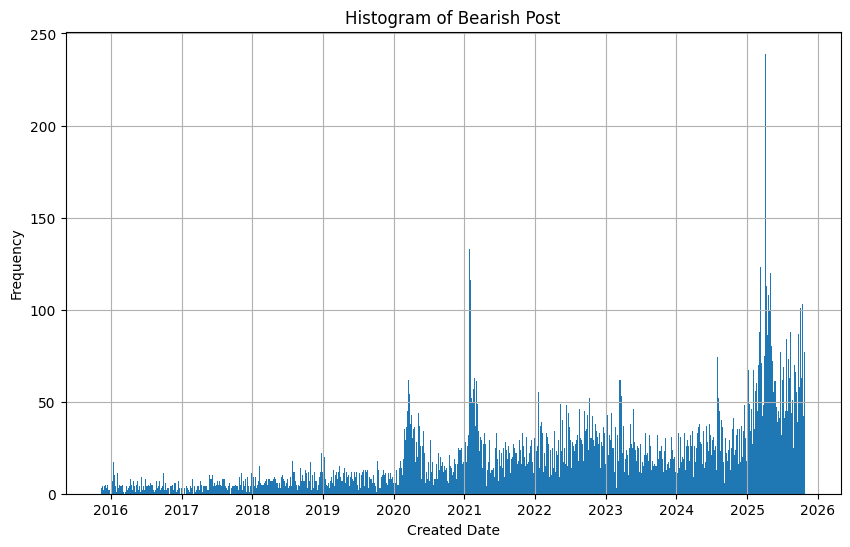

In [150]:
# prune rows with duplicate ids
final_df_bearish = final_df_clipped.drop_duplicates(subset=['id'])
print(f"Clipped DataFrame Shape: {final_df_bearish.shape}")
# round time to day
final_df_bearish['created'] = pd.to_datetime(final_df_bearish['created']).dt.floor('d')


# matplotlib histogram of created dates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
final_df_bearish['created'].hist(bins=2000)
plt.xlabel('Created Date')
plt.ylabel('Frequency')
plt.title(f'Histogram of {group.capitalize()} Post')
plt.show()

In [151]:
#save to csv
final_df_bearish.to_csv(f"sentiment_data_{group}_{start_date}_to_{end_date}.csv", index=False)

## Bullish Keywords

In [152]:
import pandas as pd
import os
group = "bullish"
path_cwd = os.getcwd()
path_full = os.path.join(path_cwd, group)



In [153]:
folder_path = []
subreddits = []
for folder in os.listdir(path_full):
    subreddits.append(folder)
    p = os.path.join(path_full, folder)
    folder_path.append(p)
    print(p)

c:\Share\CODE\POC\poc_pytorch\bullish\investing
c:\Share\CODE\POC\poc_pytorch\bullish\personalfinance
c:\Share\CODE\POC\poc_pytorch\bullish\StockMarket
c:\Share\CODE\POC\poc_pytorch\bullish\stocks
c:\Share\CODE\POC\poc_pytorch\bullish\ValueInvesting
c:\Share\CODE\POC\poc_pytorch\bullish\wallstreetbets


In [154]:
def extract_keywords(text):
    ls_text = text.split("_")
    r = ls_text[-1]
    return r

print(extract_keywords("reddit_ValueInvesting_posts_bubble"))

bubble


In [155]:
paths_json = []
for folder in folder_path:
    for file in os.listdir(folder):
        if file.endswith(".json"):
            full_path = os.path.join(folder, file)
            paths_json.append(full_path)
            print(full_path)

c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_acceleration.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_advance.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_alive.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_boom.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_bull.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_buy.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_chance.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_climb.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_confidence.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_earn.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_expansion.json
c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_fix.json
c:\S

In [156]:
all_dfs = []
for path in paths_json:
    df = pd.read_json(path)
    keyword = os.path.splitext(extract_keywords(os.path.basename(path)))[0]
    df['keyword'] = keyword
    df['subreddit'] = os.path.basename(os.path.dirname(path))
    all_dfs.append(df)
    print(f"Path: {path} | Shape: {df.shape}")

Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_acceleration.json | Shape: (231, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_advance.json | Shape: (227, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_alive.json | Shape: (197, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_boom.json | Shape: (228, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_bull.json | Shape: (225, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_buy.json | Shape: (233, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_chance.json | Shape: (247, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_climb.json | Shape: (231, 9)
Path: c:\Share\CODE\POC\poc_pytorch\bullish\investing\reddit_investing_posts_confidence.json | Shape: (230, 9)
Path: c:\Share\CODE\POC\poc_pytorch

In [157]:
final_df = pd.concat(all_dfs, ignore_index=True)
print(f"Final DataFrame Shape: {final_df.shape}")
final_df.head()

Final DataFrame Shape: (54707, 9)


,title,score,id,url,comms_num,created,body,keyword,subreddit
0,U.S. job growth accelerates in March; unemploy...,2604.0,mijlje,https://www.reddit.com/r/investing/comments/mi...,607.0,2021-04-02T12:44:18Z,https://reut.rs/3dxM6RH\n\nU.S. employers hire...,acceleration,investing
1,"At a 10-year high, wage growth for American wo...",1154.0,az3q27,https://www.reddit.com/r/investing/comments/az...,458.0,2019-03-09T13:55:41Z,https://www.marketwatch.com/story/at-a-10-year...,acceleration,investing
2,Thoughts on Real Estate Acceleration Loan (R.E...,12.0,1d0z9vm,https://www.reddit.com/r/investing/comments/1d...,798.0,2024-05-26T11:25:36Z,I’ve come across the [Real Estate Acceleration...,acceleration,investing
3,"Apple beats on revenue and profit, expects gro...",964.0,waktaz,https://www.reddit.com/r/investing/comments/wa...,136.0,2022-07-28T20:45:47Z,"**EPS**: $1.20 vs. $1.16 estimated, down 8% ye...",acceleration,investing
4,US loses its last AAA credit rating with downg...,3919.0,1koc7ai,https://www.reddit.com/r/investing/comments/1k...,352.0,2025-05-16T21:20:38Z,https://www.reuters.com/markets/us/moodys-down...,acceleration,investing


In [158]:
# min and max date in created
print(f"Min Date: {final_df['created'].min()}")
print(f"Max Date: {final_df['created'].max()}")

Min Date: 2008-10-20T12:49:55Z
Max Date: 2025-11-13T13:16:34Z


In [159]:
start_date = "2015-11-1"  
end_date = "2025-10-31"
# clipped date range to match price data
final_df_clipped = final_df[(final_df['created'] >= start_date) & (final_df['created'] <= end_date)]
print(f"Clipped DataFrame Shape: {final_df_clipped.shape}")

Clipped DataFrame Shape: (52185, 9)


Clipped DataFrame Shape: (37804, 9)


C:\Users\Lau\AppData\Local\Temp\ipykernel_23780\3870545385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_bullish['created'] = pd.to_datetime(final_df_bullish['created']).dt.floor('d')


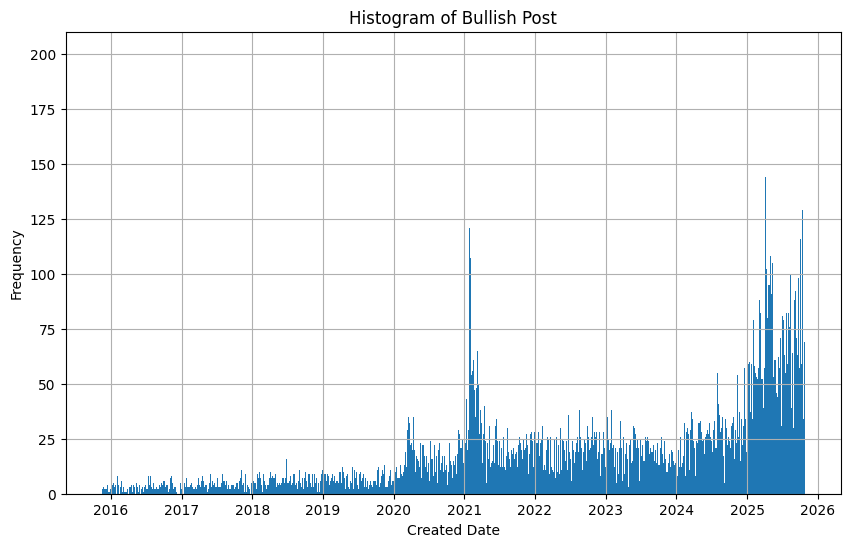

In [160]:
# prune rows with duplicate ids
final_df_bullish = final_df_clipped.drop_duplicates(subset=['id'])
print(f"Clipped DataFrame Shape: {final_df_bullish.shape}")
# round time to day
final_df_bullish['created'] = pd.to_datetime(final_df_bullish['created']).dt.floor('d')


# matplotlib histogram of created dates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
final_df_bullish['created'].hist(bins=2000)
plt.xlabel('Created Date')
plt.ylabel('Frequency')
plt.title(f'Histogram of {group.capitalize()} Post')
plt.show()

In [161]:
#save to csv
final_df_bullish.to_csv(f"sentiment_data_{group}_{start_date}_to_{end_date}.csv", index=False)

In [162]:
import yfinance as yf


def get_data(symbol,start_date,end_date):
        # Fetch historical data
    filename = f"{symbol}_{start_date}_to_{end_date}.csv"
    if os.path.exists(filename):
        print("CSV exists, skipping download:", filename)
    else:
        data = yf.download(symbol, start=start_date, end=end_date)
        data.to_csv(filename)
        print("Saved CSV:", filename)
    return pd.read_csv(filename, index_col=0, parse_dates=True)

symbol = "^VIX"
start_date = "2015-11-01"
end_date = "2025-10-31"
data = get_data(symbol, start_date, end_date)
print(data.shape)
data_vix = data.copy()
data_vix = data_vix.iloc[2:]
data_vix = data_vix.reset_index().rename(columns={"Price": "Date"})
data_vix = data_vix.drop(columns=["Open", "High", "Low", "Volume"])
data_vix.rename(columns={"Close": "VIX"}, inplace=True)
data_vix.head()

CSV exists, skipping download: ^VIX_2015-11-01_to_2025-10-31.csv
(2516, 5)


C:\Users\Lau\AppData\Local\Temp\ipykernel_23780\1707381799.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(filename, index_col=0, parse_dates=True)


,Date,VIX
0,2015-11-02,14.149999618530273
1,2015-11-03,14.539999961853027
2,2015-11-04,15.510000228881836
3,2015-11-05,15.050000190734863
4,2015-11-06,14.329999923706055


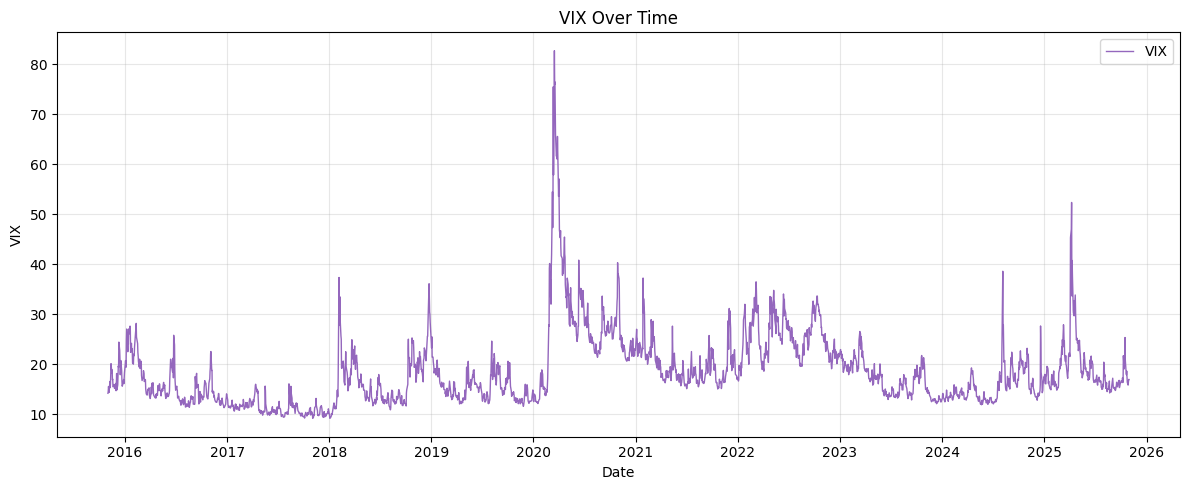

In [163]:

viz_vix = data_vix.copy()



# ensure proper dtypes
viz_vix['Date'] = pd.to_datetime(viz_vix['Date'])
viz_vix['VIX'] = pd.to_numeric(viz_vix['VIX'], errors='coerce')

# line plot of VIX over time
plt.figure(figsize=(12, 5))
plt.plot(viz_vix['Date'], viz_vix['VIX'], color='tab:purple', linewidth=1, label='VIX')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.title('VIX Over Time')
plt.grid(alpha=0.3)
plt.legend()
# plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [164]:
symbol = "SPY"

WINDOW = 7
FUTURE = 20

start_date = "2015-11-01"
end_date = "2025-10-31"
data = get_data(symbol, start_date, end_date)
print(data.shape)

data_spy = data.copy()
data_spy = data_spy.iloc[2:]
data_spy = data_spy.reset_index().rename(columns={"Price": "Date"})
data_spy = data_spy.drop(columns=["Open", "High", "Low", "Volume"])
data_spy.rename(columns={"Close": "SPY"}, inplace=True)



# set MA7 for SPY
data_spy['SPYMA'] = data_spy['SPY'].rolling(window=WINDOW).mean()
# set first rows in window to first value 
first = data_spy['SPY'].iloc[0]
# ensure numeric dtype then assign using .loc to avoid chained assignment
data_spy['SPY'] = pd.to_numeric(data_spy['SPY'], errors='coerce')
data_spy['SPYMA'] = pd.to_numeric(data_spy['SPYMA'], errors='coerce')
# offset SPYMA by FUTURE days
data_spy['SPYMA'] = data_spy['SPYMA'].shift(-FUTURE)
first_val = float(data_spy['SPY'].iat[0])
last_val = float(data_spy['SPYMA'].iat[WINDOW + FUTURE -1])
increment = (last_val - first_val) / (WINDOW + FUTURE -1)
for i in range(WINDOW + FUTURE -1):
    # gradually increase from first to the value at index WINDOW + FUTURE -1
    data_spy.at[i, 'SPYMA'] = first_val + increment * i

# percentage change of SPYMA compared to previous row, max is 0
data_spy['SPYMADROP'] = data_spy['SPYMA'].pct_change().clip(upper=0)
# set first value of SPYMADROP to second value
data_spy.at[0, 'SPYMADROP'] = data_spy.at[1, 'SPYMADROP']
data_spy.drop(columns=['SPY','SPYMA'], inplace=True)

data_spy.head()


CSV exists, skipping download: SPY_2015-11-01_to_2025-10-31.csv
(2516, 5)


C:\Users\Lau\AppData\Local\Temp\ipykernel_23780\1707381799.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(filename, index_col=0, parse_dates=True)
C:\Users\Lau\AppData\Local\Temp\ipykernel_23780\2860426575.py:36: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_spy['SPYMADROP'] = data_spy['SPYMA'].pct_change().clip(upper=0)


,Date,SPYMADROP
0,2015-11-02,-0.001761
1,2015-11-03,-0.001761
2,2015-11-04,-0.001765
3,2015-11-05,-0.001768
4,2015-11-06,-0.001771


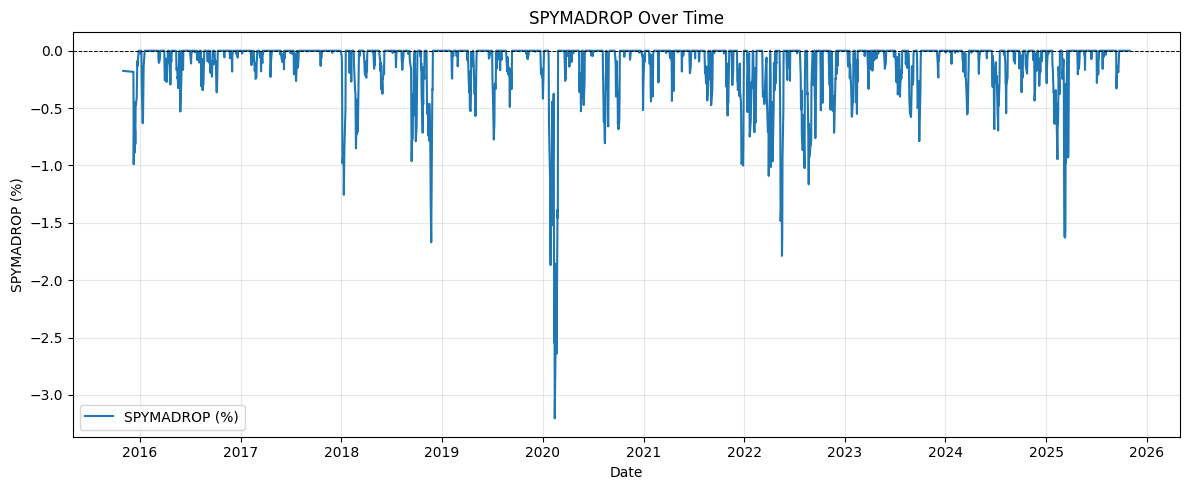

In [165]:
viz_spy = data_spy.copy()
# matplotlib visualize SPYMADROP
# ensure Date is datetime (handle if Date is index)
if 'Date' in viz_spy.columns:
    viz_spy['Date'] = pd.to_datetime(viz_spy['Date'])
else:
    viz_spy = viz_spy.reset_index().rename_axis(None).rename(columns={'index': 'Date'})
    viz_spy['Date'] = pd.to_datetime(viz_spy['Date'])

# Time series plot of SPYMADROP (as percent)
plt.figure(figsize=(12, 5))
plt.plot(viz_spy['Date'], viz_spy['SPYMADROP'] * 100, color='tab:blue', label='SPYMADROP (%)')
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)
plt.xlabel('Date')
plt.ylabel('SPYMADROP (%)')
plt.title('SPYMADROP Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



FGI JSON exists, skipping download: data_fgi.json


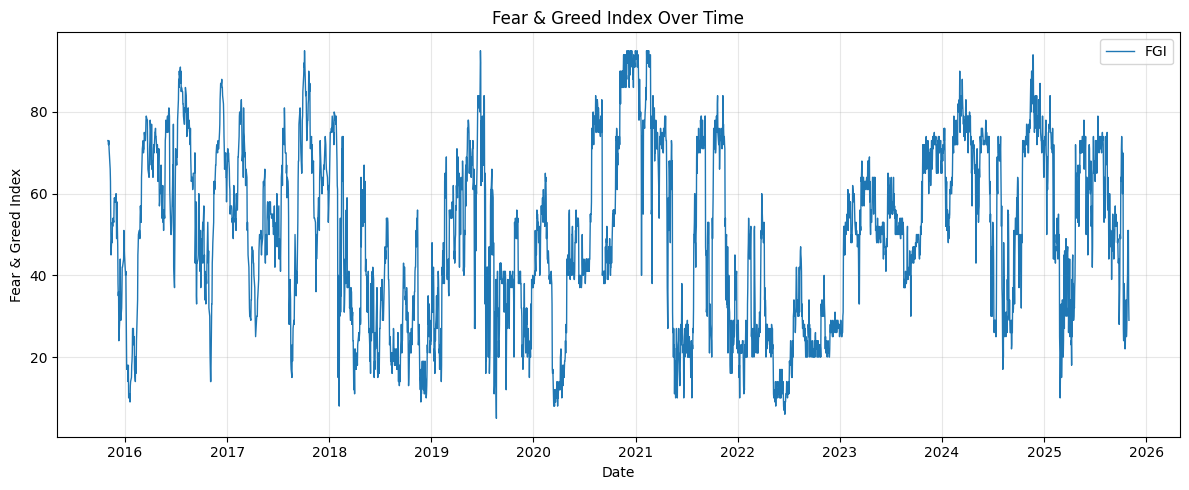

In [166]:
import requests
import json
fgi_url = "https://api.alternative.me/fng/?limit=100000"
fgi_filename = "data_fgi.json"
if os.path.exists(fgi_filename):
    print("FGI JSON exists, skipping download:", fgi_filename)
    with open(fgi_filename, 'r') as f:
        json_obj = json.load(f)
        data_list = json_obj.get('data', [])
else:
    response = requests.get(fgi_url)
    json_obj = response.json()
    with open(fgi_filename, 'w') as f:
        json.dump(json_obj, f)
        print("Downloaded FGI JSON:", fgi_filename)
    data_list = json_obj.get('data', [])

# build DataFrame from list of dicts (pd.read_json expects a file/path or JSON string, not a list)
data_fgi = pd.DataFrame(data_list)

# convert timestamp to date and rename value column
data_fgi['timestamp'] = pd.to_datetime(data_fgi['timestamp'].astype(int), unit='s').dt.strftime('%Y-%m-%d')
data_fgi.rename(columns={"value": "FGI"}, inplace=True)
data_fgi['FGI'] = pd.to_numeric(data_fgi['FGI'], errors='coerce').astype('Int64')
data_fgi.rename(columns={"timestamp": "Date"}, inplace=True)
data_fgi.drop(columns=['value_classification', 'time_until_update'], inplace=True)

supplment = "fear-greed-2011-2023.csv"
supplement_df = pd.read_csv(supplment)
# combine date
supplement_df = supplement_df.rename(columns={"Date": "Date"})
supplement_df['Date'] = pd.to_datetime(supplement_df['Date']).dt.strftime('%Y-%m-%d')
supplement_df['FGI'] = pd.to_numeric(supplement_df['FGI'], errors='coerce').astype('Int64')
# join by Date
data_fgi = pd.merge(data_fgi, supplement_df, left_on='Date', right_on='Date', how='outer')
# set FGI_y where FGI_x is null
data_fgi['FGI'] = data_fgi['FGI_x'].combine_first(data_fgi['FGI_y']).astype('Int64')
# drop extra columns
data_fgi.drop(columns=['FGI_x', 'FGI_y'], inplace=True)
data_fgi = data_fgi.sort_values(by='Date').reset_index(drop=True)

start_date = "2015-11-01"
end_date = "2025-10-31"
# clip date
data_fgi = data_fgi[(data_fgi['Date'] >= start_date) & (data_fgi['Date'] <= end_date)]

viz_fgi = data_fgi.copy()
# prepare and plot FGI time series
viz_fgi['Date'] = pd.to_datetime(viz_fgi['Date'])
viz_fgi = viz_fgi.sort_values('Date').reset_index(drop=True)
viz_fgi['FGI'] = pd.to_numeric(viz_fgi['FGI'], errors='coerce')
plt.figure(figsize=(12, 5))
plt.plot(viz_fgi['Date'], viz_fgi['FGI'], color='tab:blue', lw=1, label='FGI')

plt.xlabel('Date')
plt.ylabel('Fear & Greed Index')
plt.title('Fear & Greed Index Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [167]:
final_df_bullish = final_df_bullish.rename(columns={"created": "Date"})
final_df_bullish['Date'] = pd.to_datetime(final_df_bullish['Date']).dt.strftime('%Y-%m-%d')
final_df_bullish_frequency = final_df_bullish['Date'].value_counts().reset_index()
final_df_bullish_frequency.rename(columns={"count": "Bullish"}, inplace=True)
final_df_bullish_frequency.head()

,Date,Bullish
0,2025-04-09,124
1,2025-04-04,96
2,2025-04-07,90
3,2025-10-30,85
4,2021-02-01,84


In [168]:
final_df_bearish = final_df_bearish.rename(columns={"created": "Date"})
final_df_bearish['Date'] = pd.to_datetime(final_df_bearish['Date']).dt.strftime('%Y-%m-%d')
final_df_bearish_frequency = final_df_bearish['Date'].value_counts().reset_index()
final_df_bearish_frequency.rename(columns={"count": "Bearish"}, inplace=True)
final_df_bearish_frequency.head()

,Date,Bearish
0,2025-04-07,148
1,2025-04-04,126
2,2025-04-09,125
3,2025-04-08,110
4,2025-04-06,91


In [ ]:
combined_df = final_df_bearish_frequency.copy()
combined_df = pd.merge(combined_df, final_df_bullish_frequency, left_on='Date', right_on='Date', how='left')
combined_df = pd.merge(combined_df, data_fgi, left_on='Date', right_on='Date', how='left')
combined_df = pd.merge(combined_df, data_vix, left_on='Date', right_on='Date', how='left')
combined_df = pd.merge(combined_df, data_spy, left_on='Date', right_on='Date', how='left')
# set bullish and bearish NaN to 0
combined_df['Bullish'] = combined_df['Bullish'].fillna(0)
combined_df['Bearish'] = combined_df['Bearish'].fillna(0)
# add base to bullish and bearish
base = 2
combined_df['Bullish'] = combined_df['Bullish'] + base
combined_df['Bearish'] = combined_df['Bearish'] + base
# to int
combined_df['Bullish'] = combined_df['Bullish'].astype(int)
combined_df['Bearish'] = combined_df['Bearish'].astype(int)
print(combined_df.shape)
combined_df[100:150]

,Date,Bearish,Bullish,FGI,VIX,SPYMADROP
100,2025-08-13,44,52,73,14.489999771118164,0.000000
101,2025-10-20,44,36,29,18.229999542236328,0.000000
102,2025-10-12,43,42,24,NaN,NaN
103,2025-02-28,43,37,16,19.6299991607666,-0.002456
104,2025-08-29,43,59,50,15.359999656677246,0.000000
105,2025-07-10,43,45,71,15.779999732971191,-0.000682
106,2025-06-11,43,54,72,17.260000228881836,0.000000
107,2025-09-24,43,59,44,16.18000030517578,0.000000
108,2025-01-27,43,49,71,17.899999618530273,-0.003644
109,2025-10-07,43,48,70,17.239999771118164,0.000000


In [170]:
# XGB for SPYMA as result variable

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# split into train and test
train_size = int(len(combined_df) * 0.8)
train_df = combined_df[:train_size].copy()
test_df = combined_df[train_size:].copy()

# select features and ensure numeric types
features = ['VIX', 'FGI', 'Bullish', 'Bearish']

# prepare train/test by dropping rows without target or invalid features
train = train_df[train_df['SPYMADROP'].notna()].copy()
test = test_df[test_df['SPYMADROP'].notna()].copy()

for df in (train, test):
    df['VIX'] = pd.to_numeric(df['VIX'], errors='coerce')
    df['FGI'] = pd.to_numeric(df['FGI'], errors='coerce')

train = train.dropna(subset=features + ['SPYMADROP'])
test = test.dropna(subset=features + ['SPYMADROP'])

X_train, y_train = train[features], train['SPYMADROP']
X_test, y_test = test[features], test['SPYMADROP']


In [171]:

# mean_squared_error was already imported in a previous cell;
# use it with squared=False to get RMSE.
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 44,
    'tree_method': 'hist',
    'max_depth': 30,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 3,
    'lambda': 2.0,
    'alpha': 0.1,
    'gamma': 0,
}
num_boost_round = 1800000
bst = xgb.train(params, dtrain, num_boost_round)
# export model
model_filename = "sentiment_xgb_drop_model.json"
bst.save_model(model_filename)

y_pred = bst.predict(dtest)

# use mean_squared_error(..., squared=False) to compute RMSE
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse}")
# feature importance
importance = bst.get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance (weight):")
for feature, score in importance:
    print(f"{feature}: {score}")


RMSE: 0.0017027071368808822
Feature importance (weight):
VIX: 8241.0
FGI: 6630.0
Bullish: 4842.0
Bearish: 3619.0


In [172]:

# example prediction
# generate example data

list_example_data = [{
    'VIX': 20.0,
    'FGI': 50,
    'Bullish': 10,
    'Bearish': 5
},
                     {
    'VIX': 25.0,
    'FGI': 30,
    'Bullish': 5,
    'Bearish': 15
},
                     {
    'VIX': 15.0,
    'FGI': 70,
    'Bullish': 20,
    'Bearish': 2
},
                    {
    'VIX': 30.0,
    'FGI': 20,
    'Bullish': 3,
    'Bearish': 20
}]
for ex in list_example_data:
    example_df = pd.DataFrame([ex])
    dexample = xgb.DMatrix(example_df)
    example_pred = bst.predict(dexample)
    print(f"Example prediction: {example_pred[0] * 100} % ")

Example prediction: -0.15131360292434692 % 
Example prediction: -0.10150269418954849 % 
Example prediction: -0.013643855229020119 % 
Example prediction: -0.11736190319061279 % 


In [173]:
# import model

bst_loaded = xgb.Booster()
bst_loaded.load_model(model_filename)
y_pred = bst_loaded.predict(dtest)

In [174]:
# export y_pred with Date to csv
all_X = pd.concat([X_train, X_test])
all_pred = bst_loaded.predict( xgb.DMatrix(all_X))
print(all_pred.shape)
data_export = pd.DataFrame({
    'Date': pd.concat([train_df['Date'], test_df['Date']]),
    'SENTIMENT': all_pred
})
data_export.to_csv('sentiment_ma_drop.csv', index=False)

(2464,)


ValueError: array length 2464 does not match index length 3522

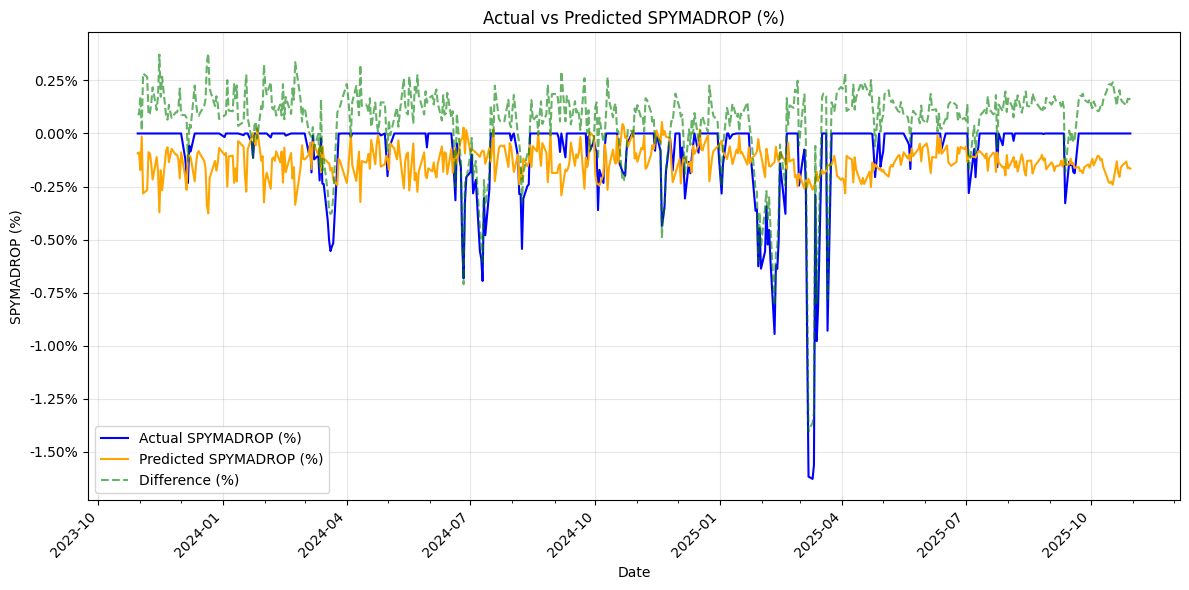

In [ ]:
# ...existing code...
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Ensure Date is datetime
test_df_plot = test_df.copy()
test_df_plot['Date'] = pd.to_datetime(test_df_plot['Date'])

# convert ratios to percentages
y_test_pct = y_test.values * 100
y_pred_pct = y_pred * 100
diff_pct = (y_test.values - y_pred) * 100

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data (percent values)
ax.plot(test_df_plot['Date'], y_test_pct, label='Actual SPYMADROP (%)', color='blue')
ax.plot(test_df_plot['Date'], y_pred_pct, label='Predicted SPYMADROP (%)', color='orange')
ax.plot(test_df_plot['Date'], diff_pct, label='Difference (%)', color='green', linestyle='--', alpha=0.6)

# Format x-axis to show quarters (using month/year)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Format y-axis to show percent sign
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.2f}%"))

# Rotate date labels for better readability
fig.autofmt_xdate(rotation=45, ha='right')

ax.set_xlabel('Date')
ax.set_ylabel('SPYMADROP (%)')
ax.set_title('Actual vs Predicted SPYMADROP (%)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()